# Computer-Vision Projects

## Improved Unsupervised Multi-level Clustering for Segmentation of Remote Sensing Imageries Containing Embedded Objects 

You can view the project documentation (white paper) in PDF format:
- [Download PDF](https://github.com/kevin200010/Computer-Vision/blob/main/paper.pdf)


### Provided Notebook 
In the provided notebook, I have shown, the algorithm approach on google earth image, on which I have tried to solve **the image segementation problem** into geo-graphical objects like (farm-land, Residential area, Roads, etc).
<br>



I have tried to apply the algorithm on the sample image ( which I took from google earth ).

In the provided exaple the results are not so improved as RGB scale as well as cordinate data both are in the same domain so ideally we dont need to apply multi level clustering and merging. But I am providing a brief over-view of the approach on which I have worked while working as Data Scietist at IMD. I cant share to detailed results because of NDA. I am atteching some results of my original work here.




###  Converted image of satelite data.
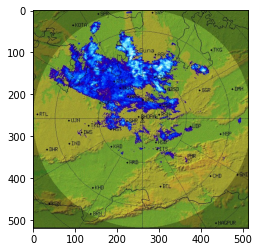

### Image after first Clustering

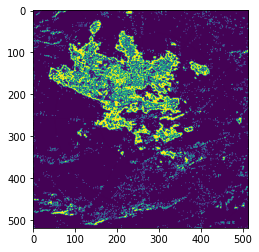

### Results after 2 level of clustering

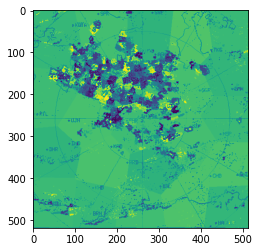



### Results after merging

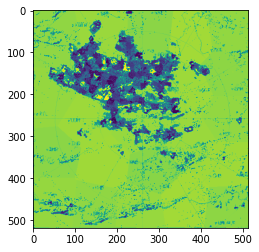


Above Provided Figures shows the clustering of the cloud data. The Image in the left hend side is showing the original Image which is 2D representaion of one the radar reading(DB-z) over the cordinates. And the figure on the right side is the outcome of the clustering approach. 

In real, there are many other parameters which are acccountable for cloud data clustering. And Also the data is also in 3D space.

## **Algorithm of the project**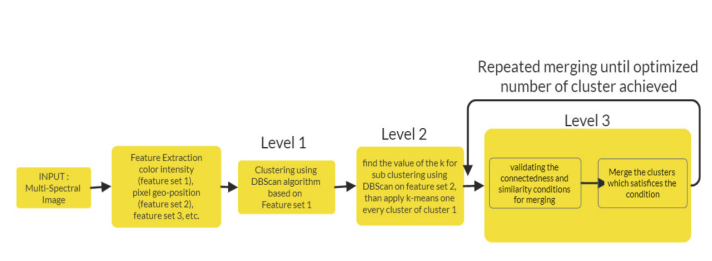

task flow of proposed multi-level unsupervised clustering method

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

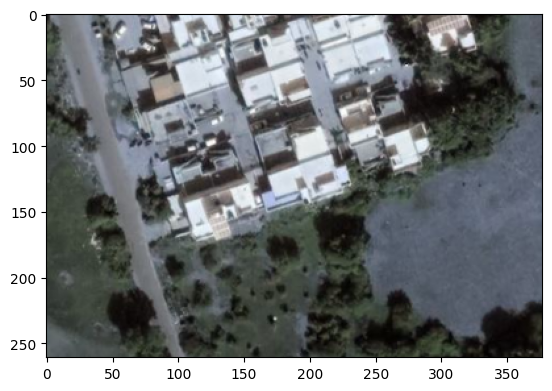

In [ ]:
img=cv2.imread('/content/small_Screenshot_1.png')
plt.imshow(img)

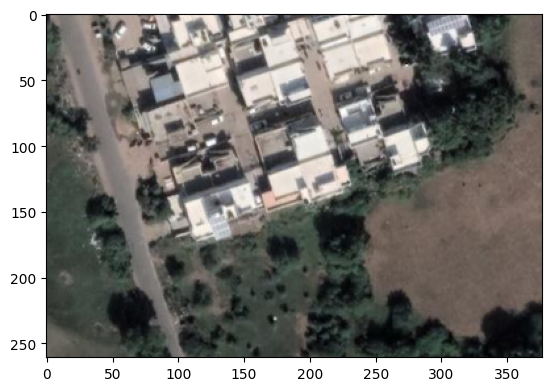

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
scaler = MinMaxScaler()
img=img.reshape((img.shape[1]*img.shape[0],3))
img = pd.DataFrame(img)
scalled_image = scaler.fit_transform(img)

In [ ]:

x = []
y = []

for i in range(261):
  for j in range(377):
    x.append(i)
    y.append(j)
img['x'] = x
img['y'] = y

In [ ]:
scalled_image = pd.DataFrame(scalled_image)

In [ ]:
scalled_image['x'] = x
scalled_image['y'] = y

In [ ]:
scalled_image

,0,1,2,x,y
0,0.117647,0.106299,0.118110,0,0
1,0.160784,0.137795,0.153543,0,1
2,0.282353,0.259843,0.267717,0,2
3,0.486275,0.456693,0.460630,0,3
4,0.568627,0.531496,0.527559,0,4
...,...,...,...,...,...
98392,0.133333,0.153543,0.169291,260,372
98393,0.137255,0.157480,0.173228,260,373
98394,0.121569,0.141732,0.153543,260,374
98395,0.121569,0.149606,0.153543,260,375


In [ ]:
scalled_image.to_csv("Scalled_image.csv",index=False)

### kmeans First level

In [ ]:
selected_features = [0,1,2]
df_selected = scalled_image[selected_features]

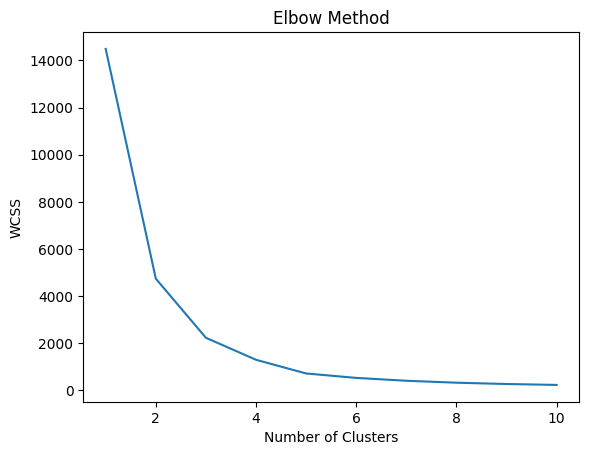

In [ ]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 2 2 2]


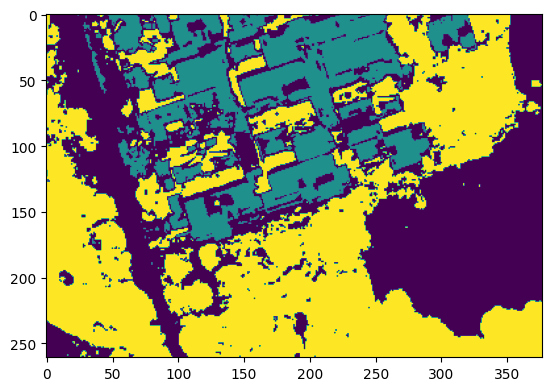

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

k_means_prediction = kmean.fit_predict(df_selected)
print(k_means_prediction)
plt.imshow(np.uint8(k_means_prediction.reshape(261,377)))

### Level 1 clustering

In [ ]:
from sklearn.cluster import DBSCAN,KMeans
db = DBSCAN(eps=0.1, min_samples=5)
kmean = KMeans(n_clusters=5)
Y_prediction = db.fit_predict(img[[0,1,2]])

Y_prediction

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
print(max(Y_prediction))

3613


In [ ]:
img['1st_level'] = Y_prediction

#### plot of -1 index elements

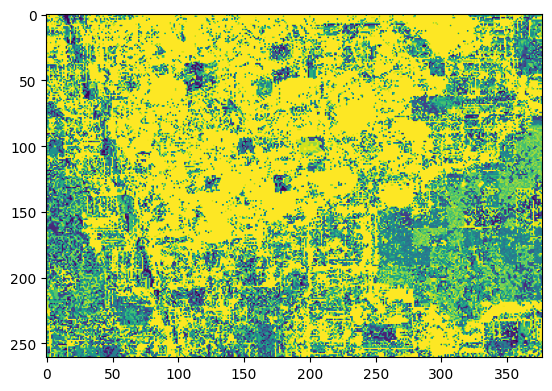

48806


In [ ]:
plt.imshow(np.uint8(Y_prediction.reshape(261,377)))
plt.show()
print(list(Y_prediction).count(-1))

[48806     9    26 ...     9    15     8]


Text(0, 0.5, 'Count')

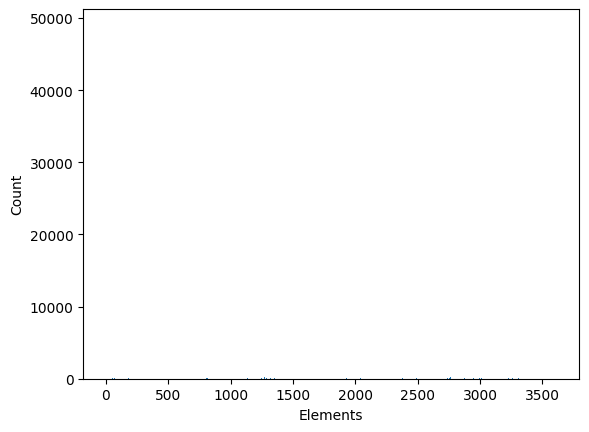

In [ ]:
graph_data = np.array(img['1st_level'])
unique_elements, counts = np.unique(graph_data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

In [ ]:
img['scalled_kmeans'] = k_means_prediction
print(img)

         0    1    2    x    y  1st_level  scalled_kmeans
0       30   27   30    0    0         -1               2
1       41   35   39    0    1         -1               2
2       72   66   68    0    2         -1               2
3      124  116  117    0    3         -1               0
4      145  135  134    0    4         -1               0
...    ...  ...  ...  ...  ...        ...             ...
98392   34   39   43  260  372         -1               2
98393   35   40   44  260  373       2642               2
98394   31   36   39  260  374         -1               2
98395   31   38   39  260  375         -1               2
98396   45   54   52  260  376         -1               2

[98397 rows x 7 columns]


In [ ]:
img = pd.DataFrame(img)

### Level 2 Clustering

<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 0 with 39298 data points sub-cluster into == 219


<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 1 with 17109 data points sub-cluster into == 51


<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 2 with 41990 data points sub-cluster into == 68
         0    1    2    x    y  1st_level  scalled_kmeans  kmenas_2nd_level  \
0       30   27   30    0    0         -1               2               NaN   
1       41   35   39    0    1         -1               2               NaN   
2       72   66   68    0    2         -1               2               NaN   
3      124  116  117    0    3         -1               0               NaN   
4      145  135  134    0    4         -1               0               NaN   
...    ...  ...  ...  ...  ...        ...             ...               ...   
98392   34   39   43  260  372         -1               2               NaN   
98393   35   40   44  260  373       2642               2               NaN   
98394   31   36   39  260  374         -1               2               NaN   
98395   31   38   39  260  375         -1               2               NaN   
98396   45   54   52  260  376         -1               2               NaN 

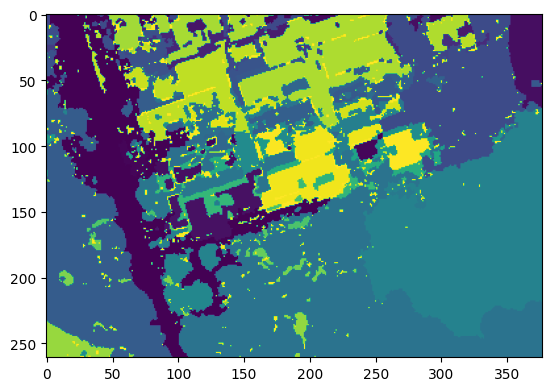

[ 3151 10729    84     9     8    50    22   122    68     7  1488    62
    64    10    10   105    14    19    11    91   104    10    14     8
     7     8   459    13   119     7    19    66     6    43    87    11
     7    20     7    19    10     7    12     7    55    34     9     7
    12    21    12     7    16    65    15    45   164   122    42  7578
    43    43   135   101   619    37   141   324    28    23    30   413
    43   244    35  9349   271   208   689    87    80    91   165    26
   191   154    24    37    57    24    59    38   490    31    23   390
    52    26 17320   423    25  1056    35    62    81    48    66    23
    99    79    49   599   100    58 14957   245   435    28   159   714
    54    22   129    11   520   142     8     6    74     9     7     7
     4     7    32    37    10    34    77   150     9     6     5    17
    11    14    10    16    21    18    34    35    14    54    15     8
    10   119     7   103    98   149    34    14   

Text(0, 0.5, 'Count')

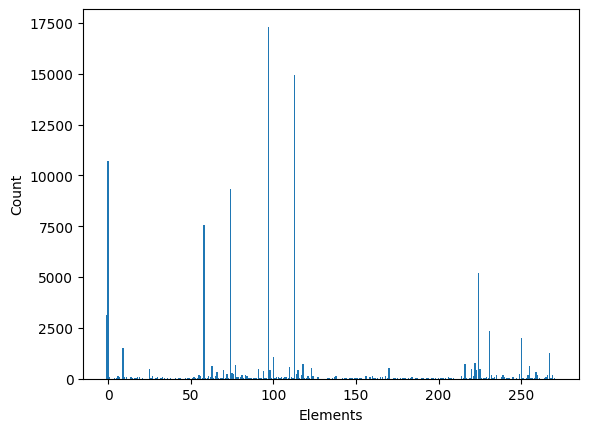

In [ ]:
# 2 level on kmeans results
second_level_clusters = 0


max_cluster = 0
for i in range(0,3):
  temp = img[img['scalled_kmeans'] == i]
  db = DBSCAN(eps=1.5, min_samples=7)
  temp_result = db.fit_predict(temp[['x','y']])
  temp['results'] = temp_result
  if(max_cluster > max(temp_result)):
    max_cluster = max(temp_result)
  print(f"custer {i} with {len(temp_result)} data points sub-cluster into == {max(temp_result)}")
  # for i in range(len(temp_result)):
  #   if(temp_result[i]!=-1):
  #     temp_result[i] = second_level_clusters + temp_result[i]
  # img.loc[temp_result.index , '2nd_level'] = temp_result
  img.loc[temp[temp_result == -1].index, 'kmeans_2nd_level'] = -1
  for j in range(max(temp_result) +1):
      img.loc[temp[temp_result == j].index, 'kmeans_2nd_level'] = second_level_clusters
      second_level_clusters += 1
  second_level_clusters = max(temp_result)+1



print(img)
# print("max_cluster=", max_cluster)
print("max_cluster=" , max(img['kmeans_2nd_level']))

plt.imshow(np.uint8(np.array(img['kmeans_2nd_level']).reshape(261,377)))
plt.show()
data = np.array(img['kmeans_2nd_level'])
unique_elements, counts = np.unique(data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

In [ ]:
# 2 level
second_level_clusters = 0


max_cluster = 0
for i in range(-1,max(Y_prediction)):
  temp = img[img['1st_level'] == i]
  db = DBSCAN(eps=2, min_samples=3)
  temp_result = db.fit_predict(temp[['x','y']])
  temp['results'] = temp_result
  if(max_cluster > max(temp_result)):
    max_cluster = max(temp_result)
  print(f"custer {i} with {len(temp_result)} data points sub-cluster into == {max(temp_result)}")
  # for i in range(len(temp_result)):
  #   if(temp_result[i]!=-1):
  #     temp_result[i] = second_level_clusters + temp_result[i]
  # img.loc[temp_result.index , '2nd_level'] = temp_result
  img.loc[temp[temp_result == -1].index, '2nd_level'] = -1
  for j in range(max(temp_result) +1):
      img.loc[temp[temp_result == j].index, '2nd_level'] = second_level_clusters
      second_level_clusters += 1
  second_level_clusters = max(temp_result)+1



print(img)
print("max_cluster=", max_cluster)
print(max(img['2nd_level']))

plt.imshow(np.uint8(np.array(img['2nd_level']).reshape(261,377)))
plt.show()

[35300 50348  2270  1574  1053   849   603   522   396   382   327   266
   272   248   233   185   200   189   177   164   131   117   130   147
   118   108    95    86    86    61    92    85   105    91    93    70
    57    54    56    40    48    43    30    35    31    23    44    18
     9    10    24    15    16    15     5     3     5     3     3     7
     4     4     3     4     3    54     7     4     4     6     3     3
     3     6     6     3     5    13     4    21     4     3     3     4
    28     8     3     3   185    17     5     3     3     3     5     3
     4     3    21    26    10     5    42     6     4     9    17    11
     4     3     3     5     4     5     8]


Text(0, 0.5, 'Count')

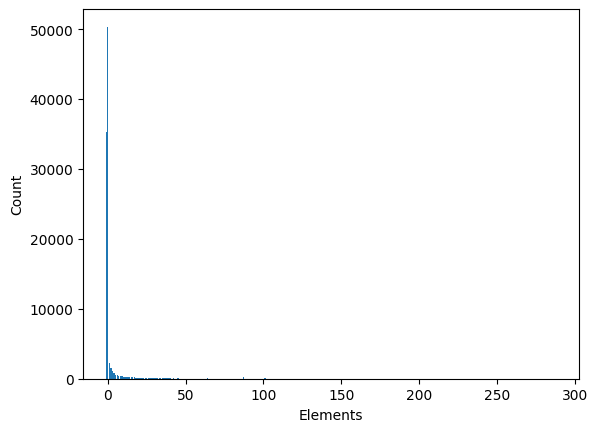

In [ ]:
data = np.array(img['2nd_level'])
unique_elements, counts = np.unique(data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

## MERGING

In [ ]:
img

,0,1,2,x,y,1st_level,scalled_kmeans,kmenas_2nd_level,kmeans_2nd_level,2nd_level
0,30,27,30,0,0,-1,2,NaN,52.0,0.0
1,41,35,39,0,1,-1,2,NaN,52.0,0.0
2,72,66,68,0,2,-1,2,NaN,52.0,0.0
3,124,116,117,0,3,-1,0,NaN,0.0,0.0
4,145,135,134,0,4,-1,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
98392,34,39,43,260,372,-1,2,NaN,97.0,101.0
98393,35,40,44,260,373,2642,2,NaN,97.0,-1.0
98394,31,36,39,260,374,-1,2,NaN,97.0,101.0
98395,31,38,39,260,375,-1,2,NaN,97.0,101.0


In [ ]:
## merging
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['kmeans_2nd_level']))):
  temp = img[img['kmeans_2nd_level'] == i]
  print(i,len(temp))
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))


0 10729
1 84
2 9
3 8
4 50
5 22
6 122
7 68
8 7
9 1488
10 62
11 64
12 10
13 10
14 105
15 14
16 19
17 11
18 91
19 104
20 10
21 14
22 8
23 7
24 8
25 459
26 13
27 119
28 7
29 19
30 66
31 6
32 43
33 87
34 11
35 7
36 20
37 7
38 19
39 10
40 7
41 12
42 7
43 55
44 34
45 9
46 7
47 12
48 21
49 12
50 7
51 16
52 65
53 15
54 45
55 164
56 122
57 42
58 7578
59 43
60 43
61 135
62 101
63 619
64 37
65 141
66 324
67 28
68 23
69 30
70 413
71 43
72 244
73 35
74 9349
75 271
76 208
77 689
78 87
79 80
80 91
81 165
82 26
83 191
84 154
85 24
86 37
87 57
88 24
89 59
90 38
91 490
92 31
93 23
94 390
95 52
96 26
97 17320
98 423
99 25
100 1056
101 35
102 62
103 81
104 48
105 66
106 23
107 99
108 79
109 49
110 599
111 100
112 58
113 14957
114 245
115 435
116 28
117 159
118 714
119 54
120 22
121 129
122 11
123 520
124 142
125 8
126 6
127 74
128 9
129 7
130 7
131 4
132 7
133 32
134 37
135 10
136 34
137 77
138 150
139 9
140 6
141 5
142 17
143 11
144 14
145 10
146 16
147 21
148 18
149 34
150 35
151 14
152 54
153 15
154 8
1

In [ ]:
def check_neighbourhood(img, index,i ,j,threshld):
  cluster_i = img[img[index] == i]
  cluster_i = cluster_i.reset_index()
  cluster_j = img[img[index] == j]
  cluster_j = cluster_j.reset_index()

  count_neighboor = 0
  for i in range(len(cluster_i)):

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1 ]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

  if(count_neighboor >= threshld):
    return True
  else:
    return False

In [ ]:
no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'kmeans_2nd_level',i ,j,2)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue

In [ ]:
print(merged)

[ 11  24   0   0   0  57   0   8   7  71   0   0  16   0  29   0  12   0
   0  25   0   0  26   0   1  19  22   0   0  14   0   0   0   0  37   0
   0  34   0   0   0   0   0   0  61   0  49   0   0  46   0   0  67  63
   0  66  58   5  56   0   0  44  64  53  62   0  55  52   0   0  79   9
  90   0  77  97  86  74 113  70 126 119 125   0  94   0  76 109   0 140
  72 123   0   0  84 136 103  75   0   0   0 159   0  96   0   0   0   0
 182  87 147   0   0  78   0 118   0 132 115  81 216 141   0  91 127  82
  80 124   0 131   0 129 117   0   0   0  95 254   0   0  89 121   0 259
   0   0 151 110   0   0   0 146   0   0 155 154   0   0   0 101   0 162
 161   0 167   0 172 164   0   0   0   0 166   0   0   0   0   0   0   0
   0   0 108   0   0   0   0   0   0   0   0 193   0 191   0   0 199   0
   0 196   0 203   0 201   0   0   0   0   0   0   0   0   0   0   0   0
 120   0   0   0   0   0   0   0 238   0   0   0   0   0   0 242   0   0
   0   0   0   0 224   0 243   0 231 240   0 246 24

In [ ]:
m1 = merged

In [ ]:
c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print(len(merged)-c)

160


In [ ]:
final_cluster = 0
merged1 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged1[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      print(merged1)
      img.loc[img['2nd_level'] == i, 'merged_cluster'] = final_cluster
      # print(img.loc[img['2nd_kmeans'] == i])
      img.loc[img['2nd_level'] == merged[i], 'merged_cluster'] = final_cluster
      # print(img.loc[img['2nd_kmeans'] == merged[i]])
      merged1[i] = -1
      merged1[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['2nd_level'] == i, 'merged_cluster'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print(max(img['merged_cluster']))


In [ ]:
len(img['merged_cluster'].unique())

89

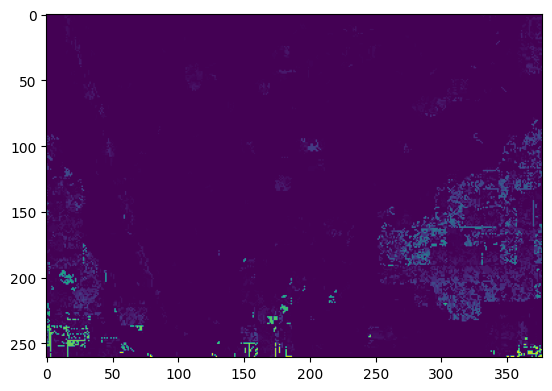

In [ ]:
plt.imshow(np.uint8(np.array(img['merged_cluster']).reshape(261,377)))
plt.show()

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster']))):
  temp = img[img['merged_cluster'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster'] == i, 'merged_cluster_2'] = final_cluster
      img.loc[img['merged_cluster'] == merged[i], 'merged_cluster_2'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster'] == i, 'merged_cluster_2'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_2nd merging =", max(img['merged_cluster_2']))

plt.imshow(np.uint8(np.array(img['merged_cluster_2']).reshape(261,377)))
plt.show()


In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_2']))):
  temp = img[img['merged_cluster_2'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_2',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_2'] == i, 'merged_cluster_3'] = final_cluster
      img.loc[img['merged_cluster_2'] == merged[i], 'merged_cluster_3'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_2'] == i, 'merged_cluster_3'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_3rd merging =", max(img['merged_cluster_3']))

plt.imshow(np.uint8(np.array(img['merged_cluster_3']).reshape(261,377)))
plt.show()


In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_3']))):
  temp = img[img['merged_cluster_3'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_3',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_3'] == i, 'merged_cluster_4'] = final_cluster
      img.loc[img['merged_cluster_3'] == merged[i], 'merged_cluster_4'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_3'] == i, 'merged_cluster_4'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_4th merging =", max(img['merged_cluster_4']))

plt.imshow(np.uint8(np.array(img['merged_cluster_3']).reshape(261,377)))
plt.show()


In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_4']))):
  temp = img[img['merged_cluster_4'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_4',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_4'] == i, 'merged_cluster_5'] = final_cluster
      img.loc[img['merged_cluster_4'] == merged[i], 'merged_cluster_5'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_4'] == i, 'merged_cluster_5'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_5th merging =", max(img['merged_cluster_5']))

plt.imshow(np.uint8(np.array(img['merged_cluster_5']).reshape(261,377)))
plt.show()


In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_5']))):
  temp = img[img['merged_cluster_5'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_5',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_5'] == i, 'merged_cluster_6'] = final_cluster
      img.loc[img['merged_cluster_5'] == merged[i], 'merged_cluster_6'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_5'] == i, 'merged_cluster_6'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_6th merging =", max(img['merged_cluster_6']))

plt.imshow(np.uint8(np.array(img['merged_cluster_6']).reshape(261,377)))
plt.show()


### The Results for the given notebook :
| Original Image | ![main_setalite](small_Screenshot_1.png) |
| --- | --- |
| Clustered Image after 7 iterations | ![main_setalite7](https://github.com/kevin200010/Computer-Vision/assets/54860223/5dc0dc0e-4288-4e78-b637-d26bec1b1a8d) |



## Results :
## For checking the proposed method improvement, I have used the Silhouette-Score for confirming the cluster separability.

<img width="60%" alt="image" src="https://github.com/kevin200010/Computer-Vision/assets/54860223/70163e72-6f88-4ca8-9ebc-1c2bed5135fd">

### As we can see that the cluster are not merging after some iteration which shows that the cluster count is optimized. In the specific image we have considered R, G and B along with X,Y cordinate for clustering .